Name: Michelle Hsu

Andrew ID: mhsu1

### Instructions
1. Fill in your name and Andrew ID.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any question for which your code fails to run will receive 0 points.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).
6. Have fun!

### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package (https://spacy.io). Instructions for installing this are part of the tutorial file "`95-865 Anaconda and Jupyter setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture (we have included it in this homework assignment as the file "`95-865 spaCy demo.ipynb`").

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project (https://www.gutenberg.org/browse/scores/top). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [1]:
import spacy
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger']) 
import glob
filename = glob.glob('./HW1_Dataset/*.txt')

In [2]:
text = " "
for i in filename:
    text = text + open(i).read()

(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks.

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [3]:
parsed_text = nlp(text)

In [4]:
from collections import Counter
from operator import itemgetter
import re
import pandas as pd
frequency = Counter()
for token in parsed_text:
    lemma = token.lemma_
    if re.match('[a-zA-Z]+$', lemma):
        frequency[lemma] += 1
#Construct the freqency table and sort by frequency
sorted_lemma_count_pairs = sorted(frequency.items(),
                                  reverse=True,
                                  key=itemgetter(1))
index = pd.Index(range(1,len(sorted_lemma_count_pairs)+1))
freq = pd.DataFrame(sorted_lemma_count_pairs, index=index)
freq.columns = ['Word', 'Frequency']
freq.index.rename('Rank', inplace=True)
#Print the top 50 most frequent words
freq[0:50]

,Word,Frequency
Rank,,
1,the,648221
2,be,427198
3,and,394399
4,of,378295
5,a,337297
6,to,314597
7,in,192739
8,I,188246
9,have,186525


(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes).

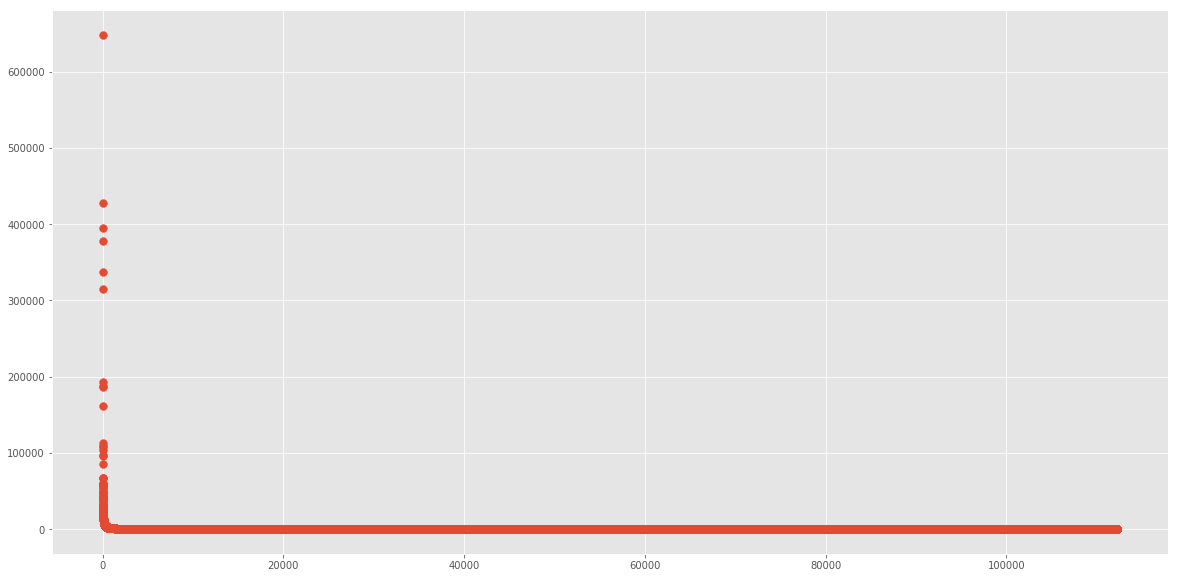

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Raw scatter plot
plt.figure(figsize=(20,10))
plt.scatter(freq.index,freq['Frequency'], s =60)
plt.show()

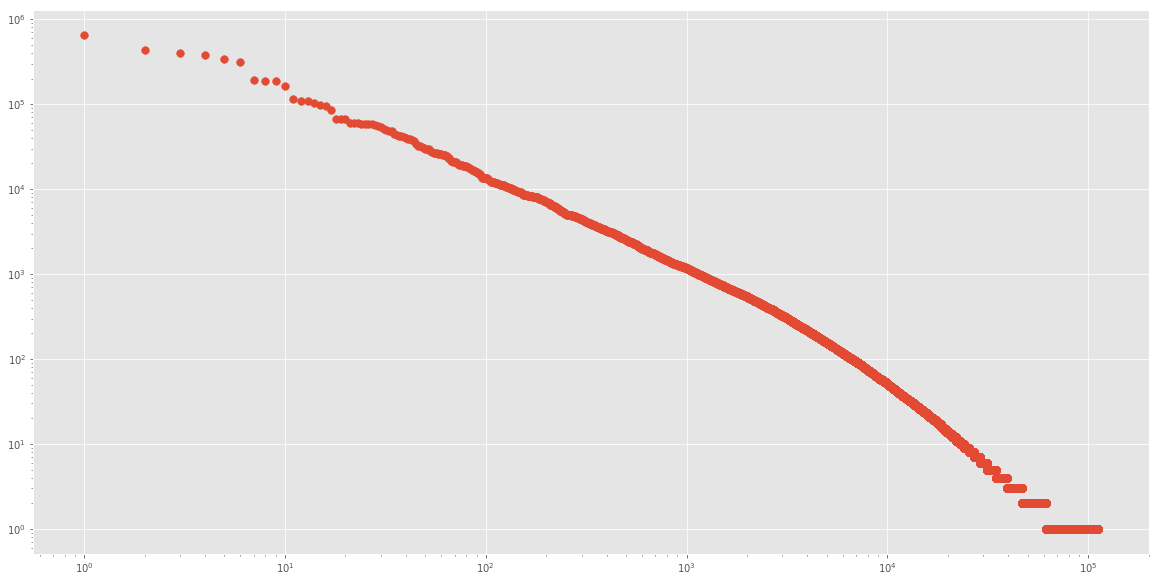

In [6]:
# Log-log plot
plt.figure(figsize=(20,10))
plt.scatter(freq.index,freq['Frequency'], s =60)
plt.yscale('log')
plt.xscale('log')
plt.show()

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***
<br>The log-log plot transforms the Zipf's law into a linear form, which still satisfies the condition of power law. The original formula is turned into lnf(r) = -cln(r), which is similar to a linear representation.

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [8]:
print('Probability of drawing one of the 4 most frequent words: ')
top4_prob = sum([count for token, count in sorted_lemma_count_pairs[0:4]])/sum([count for token, count in sorted_lemma_count_pairs])
print(round(top4_prob,5))
print('Probability of drawing one of the 50 most frequent words: ')
top50_prob = sum([count for token, count in sorted_lemma_count_pairs[0:50]])/sum([count for token, count in sorted_lemma_count_pairs])
print(round(top50_prob,5))

Probability of drawing one of the 4 most frequent words: 
0.15296
Probability of drawing one of the 50 most frequent words: 
0.45647


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [10]:
print("Occur only once: ")
count_only_once = 0
for i in range(len(sorted_lemma_count_pairs)):
    if sorted_lemma_count_pairs[i][1] == 1:
        count_only_once += 1
print(round(count_only_once/len(sorted_lemma_count_pairs),5))
print("Occur fewer than 10 times: ")
count_fewer_than_10 = 0
for i in range(len(sorted_lemma_count_pairs)):
    if sorted_lemma_count_pairs[i][1] < 10:
        count_fewer_than_10 += 1
print(round(count_fewer_than_10/len(sorted_lemma_count_pairs),5))

Occur only once: 
0.44966
Occur fewer than 10 times: 
0.78527


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [40 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is http://localhost:8888/tree), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [12 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [11]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/michellehsu/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

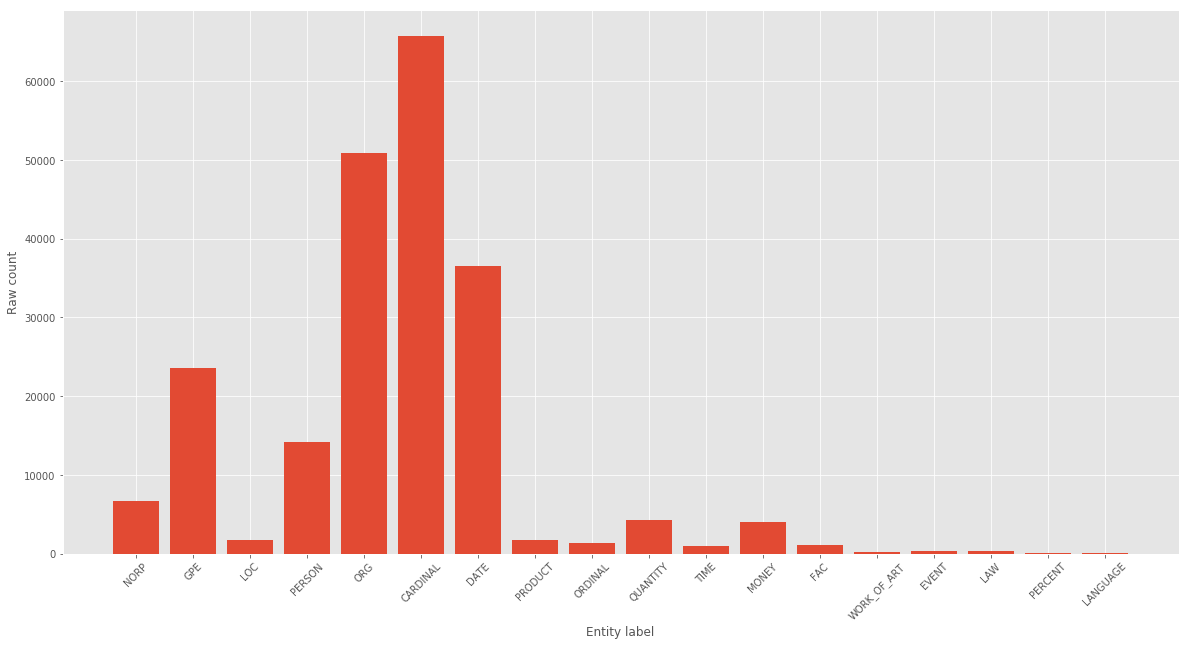

In [12]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

for i in [entity.label_ for i in range(len(reuters_nlp)) for entity in reuters_nlp[i].ents]:
    label_counter[i] += 1
plt.figure(figsize=(20,10))
plt.bar(range(len(label_counter.keys())), label_counter.values(), align='center')
plt.xticks(range(len(label_counter.keys())), label_counter.keys(), rotation=45)
plt.xlabel('Entity label')
plt.ylabel('Raw count')
plt.show()

(b) [12 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in HW0) will be helpful here.   

In [13]:
# Top 10 most frequently occured entity with labels ORG
org_counter = Counter()
for i in range(len(reuters_nlp)):
    org = []
    for word in [entity.orth_ for entity in reuters_nlp[i].ents if ('ORG') in entity.label_]:
        org.append(word)      
    org_list = set(org)
    for word in org_list:
        org_counter[word] += 1
sorted_org_count = sorted(org_counter.items(),
                            reverse=True,
                            key=itemgetter(1))
for org, count in sorted_org_count[0:10]:
    print(org, ":", count)

Avg : 583
Reuters : 445
the Securities and Exchange Commission : 244
EC : 240
USDA : 226
NET : 203
Treasury : 157
FED : 141
Congress : 138
Fed : 135


In [14]:
# Top 10 most frequently occured entity with labels GPE
gpe_counter = Counter()
for i in range(len(reuters_nlp)):
    gpe=[]
    for word in [entity.orth_ for entity in reuters_nlp[i].ents if ('GPE') in entity.label_]:
        gpe.append(word)      
    gpe_list = set(gpe)
    for word in gpe_list:
        gpe_counter[word] += 1
sorted_gpe_count = sorted(gpe_counter.items(),
                            reverse=True,
                            key=itemgetter(1))
for gpe, count in sorted_gpe_count[0:10]:
    print(gpe, ":", count)

U.S. : 1666
Shr : 690
Japan : 536
the United States : 345
U.K. : 309
Canada : 243
New York : 239
West Germany : 232
Washington : 230
JAPAN : 221


(c) [16 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [15]:
c = 0
for i in range(len(reuters_nlp)):
    if ('OPEC') in [i.orth_ for i in list(reuters_nlp[i].ents)]:
        c += 1
#Calculate P('OPEC')
opec_prob = c/len(reuters_nlp)

In [16]:
#Calculate P(gpe) for every GPE
gpe_prob = []
for i in range(len(sorted_gpe_count)):
    gpe_prob.append((sorted_gpe_count[i][0], sorted_gpe_count[i][1]/len(reuters_nlp)))

In [17]:
#Calculate the joint probability of evrey GPE and 'OPEC'
article_with_OPEC = []
joint_prob = []
joint_counter = Counter()
for i in range(len(reuters_nlp)):
    if ('OPEC') in [i.orth_ for i in list(reuters_nlp[i].ents)]:
        article_with_OPEC.append(i)

for i in article_with_OPEC:
    temp = []
    temp.extend(entity.orth_ for entity in reuters_nlp[i].ents if ('GPE') in entity.label_)
    gpe_opec = set(temp)
    for j in gpe_opec:
        joint_counter[j] += 1 
sorted_joint_count = sorted(joint_counter.items(),
                            reverse=True,
                            key=itemgetter(1))
for joint, count in sorted_joint_count:
    joint_prob.append((joint, count/len(reuters_nlp)))

In [18]:
#Calculate PMI
gpe_opec_prob = []
gp = dict(gpe_prob)
jp = dict(joint_prob)
for i in jp.keys():
    gpe_opec_prob.append((i, jp[i]/(gp[i]*opec_prob)))
sorted_by_PMI = sorted(gpe_opec_prob, key=lambda tup: tup[1], reverse = True)
sorted_by_PMI[0:50]

[('Balao', 93.0),
 ('Emirates', 93.0),
 ('Yanbu', 93.0),
 ('Reventador', 93.0),
 ('Tripoli', 93.0),
 ("The United States'", 93.0),
 ('Lichtblau', 93.0),
 ('Duri', 93.0),
 ('Minas', 93.0),
 ('Sulphur', 93.0),
 ('I.E.', 93.0),
 ('L.F.', 93.0),
 ('the Lake Charles', 93.0),
 ('Bethesda', 93.0),
 ('Easter', 93.0),
 ("Gabon on Africa's", 93.0),
 ('PGRT', 93.0),
 ('CERA', 93.0),
 ('Neutral Zone', 93.0),
 ('Saudi Arabia 500,000', 93.0),
 ('Aguarico', 93.0),
 ('El Salado', 93.0),
 ('Ecaudor', 93.0),
 ("Ju'aymah", 93.0),
 ('Nazir', 93.0),
 ("SAUDI ARABIA'S", 93.0),
 ('BAHRAIN', 93.0),
 ('Doha', 93.0),
 ('DISCUSSION', 93.0),
 ('Visnews', 92.99999999999999),
 ('Vienna', 79.05),
 ('Riyadh', 74.39999999999999),
 ('QUOTA', 69.75),
 ("Saudi Arabia's", 63.93749999999999),
 ('Dubai', 61.999999999999986),
 ('Quito', 61.999999999999986),
 ('Brent', 61.999999999999986),
 ('Qatar', 53.653846153846146),
 ('Caracas', 51.66666666666666),
 ('Libya', 50.72727272727273),
 ('UAE', 49.599999999999994),
 ('ECUADOR',

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***
From the result above, we can see that most of the GPE is relevant to "OPEC". For example, one of the word that has the highest PMI is 'Balao', which is oil terminal on the Pacific coast. Since the relationship of 'Balao' and 'OPEC' is considered "interesting", the probability of their co-occurrence is higher than they were to occur independently. Besides, there are lots of words with the same PMI such as 'Balao', 'Emirates', 'Yanbu', etc. These words are also deemed as "interesting" relationship in articles. However, there are still some GPE such as 'I.E.' or 'L.F.', which should not be included but have high PMI. These unexpected results may due to stop words. We didn't exclude stop words before calculating PMI. Thus, some stop words were used to calculate the PMI.

### [Problem 4] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form:
https://goo.gl/forms/Q0cz2NhZbuIuS8iR2